In [124]:
!pip install pypandoc

In [2]:
# I have modified code a little bit so you can see what's really happening in each cell.

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
from matplotlib import pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [6]:
# Check number of training and testing fraction.

print(f'Training Instances: {X_train.shape}')
print(f'Testing Instances: {X_test.shape}')

Training Instances: (50000, 32, 32, 3)
Testing Instances: (10000, 32, 32, 3)


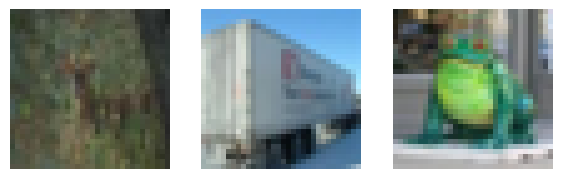

In [8]:
# Let's look at some examples

plt.figure(figsize=[7, 3])
plt.subplot(131);plt.imshow(X_train[10]);plt.axis('off');
plt.subplot(132);plt.imshow(X_train[15]);plt.axis('off');
plt.subplot(133);plt.imshow(X_train[19]);plt.axis('off');

In [12]:
# Have a look at pixel values of one example let say:

X_train[0] 

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
# Normalize those pixel values so that all values are between 0 and 1 (for models to work faster).

X_train = X_train/255
X_test = X_test/255

In [38]:
# First we'll try a simple neural networks to see if they perform better?

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(units=3000, activation='relu'),
        layers.Dense(units=1000, activation='relu'),
        layers.Dense(units=10, activation='sigmoid')
])
ann.compile(optimizer='SGD', # Gradient Descent optimizer
           loss='sparse_categorical_crossentropy', # Most values maybe zero and only ground truth 
                                                   # will be near 1, that's why sparse loss.
           metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 31ms/step - accuracy: 0.3000 - loss: 1.9339
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.4215 - loss: 1.6456
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.4563 - loss: 1.5496
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.4782 - loss: 1.4846
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.4980 - loss: 1.4341


In [40]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4794 - loss: 1.4670


[1.472495675086975, 0.4733999967575073]

In [42]:
from sklearn.metrics import classification_report
y_pred_ann = ann.predict(X_test)
y_pred_classes = [np.argmax(item) for item in y_pred_ann]
print('Classification Report\n\n ',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Classification Report

                precision    recall  f1-score   support

           0       0.58      0.48      0.53      1000
           1       0.51      0.68      0.58      1000
           2       0.52      0.13      0.21      1000
           3       0.37      0.24      0.29      1000
           4       0.37      0.56      0.44      1000
           5       0.37      0.44      0.40      1000
           6       0.54      0.56      0.55      1000
           7       0.67      0.44      0.53      1000
           8       0.45      0.78      0.57      1000
           9       0.54      0.43      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [22]:
# Now let's try the CNN to see if they perform better than simple NN.
from datetime import datetime
import os
cnn = models.Sequential([
    # Convolutional Layers:
    layers.Conv2D(filters=50, kernel_size = (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    # Dense Layers:
    layers.Flatten(),
    layers.Dense(units=70, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
current_dir = os.getcwd()
checkpoint_filepath = os.path.join(current_dir, 'ckpt', 'checkpoint.model.keras')
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
log_dir1 = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir1)
cnn.fit(X_train, y_train, 
        epochs=10, 
        callbacks=[tensorboard_callback])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.3654 - loss: 1.7390
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5935 - loss: 1.1560
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6570 - loss: 0.9851
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6832 - loss: 0.9168
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7037 - loss: 0.8515
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7228 - loss: 0.7946
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7319 - loss: 0.7600
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7535 - loss: 0.7068
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7636 - loss: 0.6744
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7737 - loss: 0.6424


In [48]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6939 - loss: 0.9389


[0.9506763815879822, 0.6922000050544739]

In [50]:
y_pred_cnn = cnn.predict(X_test)
y_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [129]:
# CNN Correct Predictions.

print('Compare ground truth labels and predicted ones:')
print('_'*46)
print(y_test[:10])
print('_'*43)
print(y_classes_cnn[:10])
print('_'*43)


corrected_counts=0
total_counts=0
for i in range(10):
    total_counts+=1
    if y_test[i]==y_classes_cnn[i]:
        corrected_counts+=1
    else:
        pass
print(f'CNN prediction:\n {corrected_counts} corrected counts out of total {total_counts} counts.')
print('_'*43)

Compare ground truth labels and predicted ones:
______________________________________________
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]
___________________________________________
[3, 8, 8, 0, 4, 7, 1, 6, 3, 1]
___________________________________________
CNN prediction:
 8 corrected counts out of total 10 counts.
___________________________________________


In [131]:
# ANN Correct Predictions.

print('Compare ground truth labels and predicted ones:')
print('_'*46)
print(y_test[:10])
print('_'*43)
print(y_pred_classes[:10])
print('_'*43)


corrected_counts=0
total_counts=0
for i in range(10):
    total_counts+=1
    if y_test[i]==y_pred_classes[i]:
        corrected_counts+=1
    else:
        pass
print(f'ANN prediction:\n {corrected_counts} corrected counts out of total {total_counts} counts.')
print('_'*43)

Compare ground truth labels and predicted ones:
______________________________________________
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]
___________________________________________
[3, 8, 8, 8, 4, 6, 3, 6, 4, 1]
___________________________________________
ANN prediction:
 6 corrected counts out of total 10 counts.
___________________________________________


## CNN performed relatively bit better than simple NN.